# Perceptron Trick Algorithm

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [3]:
X[:0].shape

(0, 2)

In [4]:
X[:1].shape

(1, 2)

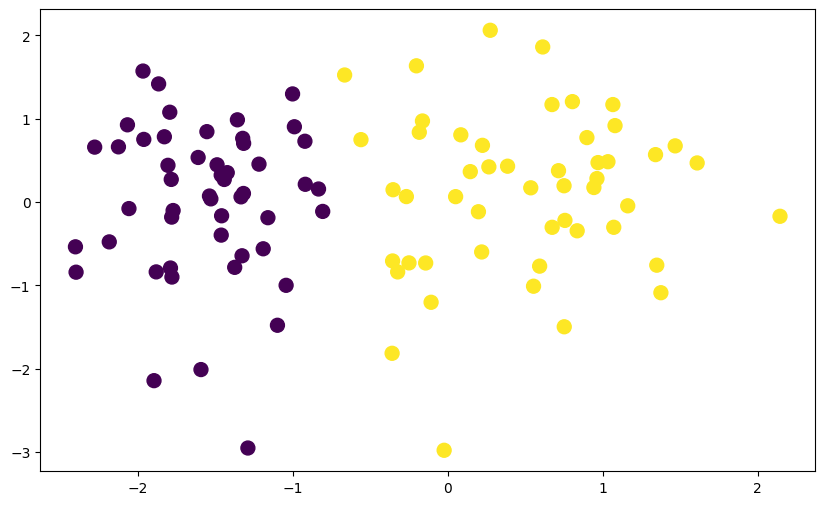

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,s=100)

In [6]:
def step(z):
    return 1 if z>0 else 0

In [7]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [8]:
intercept_,coef_ = perceptron(X,y)
print('coef_     ',coef_)
print('intercept_',intercept_)

coef_      [1.33965617 0.18627077]
intercept_ 0.9


In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

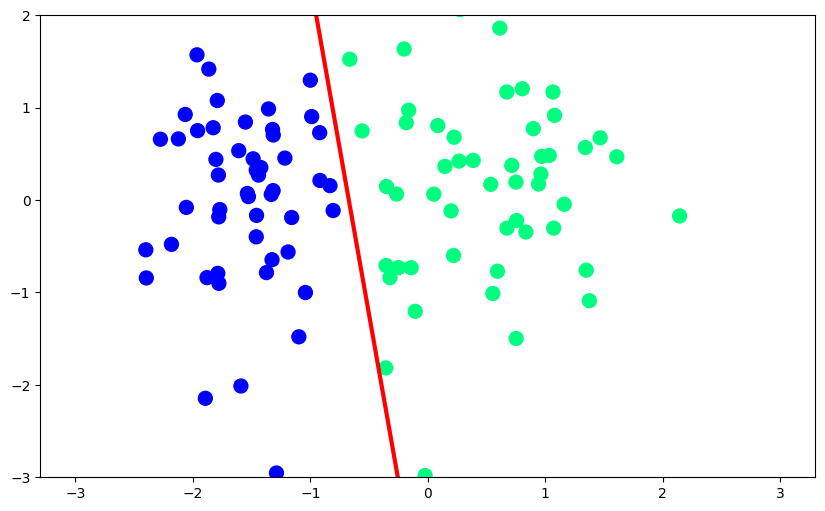

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [11]:
def perceptron(X,y):
    m=[]
    b=[]
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    for i in range(400):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m,b

In [12]:
m,b=perceptron(X,y)

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [14]:
fig, ax = plt.subplots()
x_i=np.arange(-3,3,0.1)
y_i=x_i*m[0]+b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)
plt.ylim(-3,3)
def update(i):
    label='epoch{0}'.format(i+1)
    ax.plot(x_i,x_i*m[i]+b[i],'r-')
    ax.set_xlabel(label)
    plt.show()

ani=FuncAnimation(fig,update,repeat=True,frames=400,interval=10)
ani

<IPython.core.display.Javascript object>